In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

### Dataset loading

In [165]:
# Load the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Inspection

In [166]:
tips.shape

(244, 7)

In [167]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [168]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [169]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [170]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [171]:
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [172]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

C:\Users\419007\AppData\Local\Temp\ipykernel_21536\2024686372.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tips, x='tip',y='total_bill', palette='Set2')


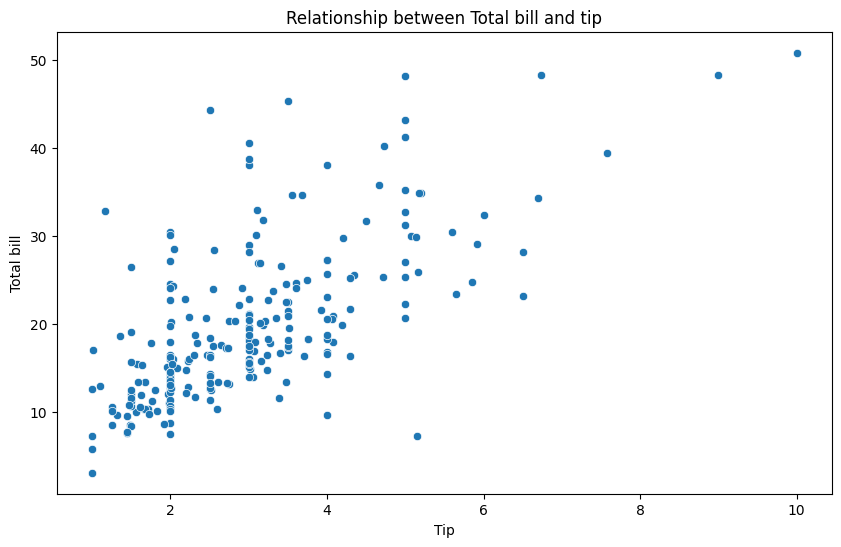

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x='tip',y='total_bill', palette='Set2')
plt.title('Relationship between Total bill and tip')
plt.xlabel('Tip')
plt.ylabel('Total bill')
plt.show()

In [174]:
cat_col=['sex', 'smoker', 'day', 'time']
for i in cat_col:
    print(tips[i].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


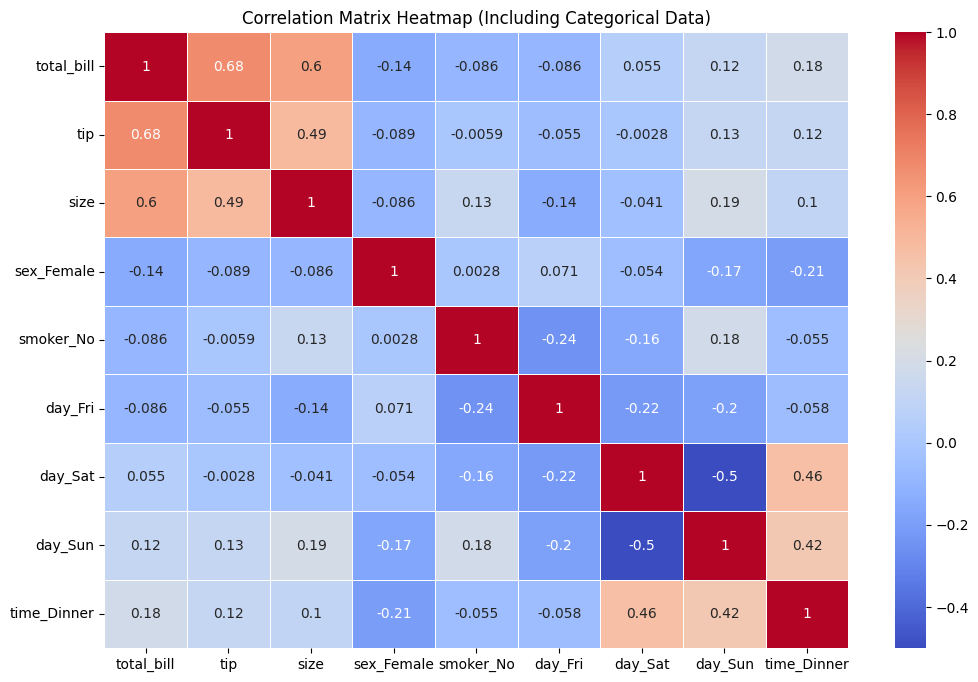

In [175]:
#Onehot encoding
# Convert categorical data to numerical data using one-hot encoding
tips_encoded = pd.get_dummies(tips,drop_first=True)
# Calculate the correlation matrix for the encoded dataset
correlation_matrix = tips_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Including Categorical Data)')
plt.show()

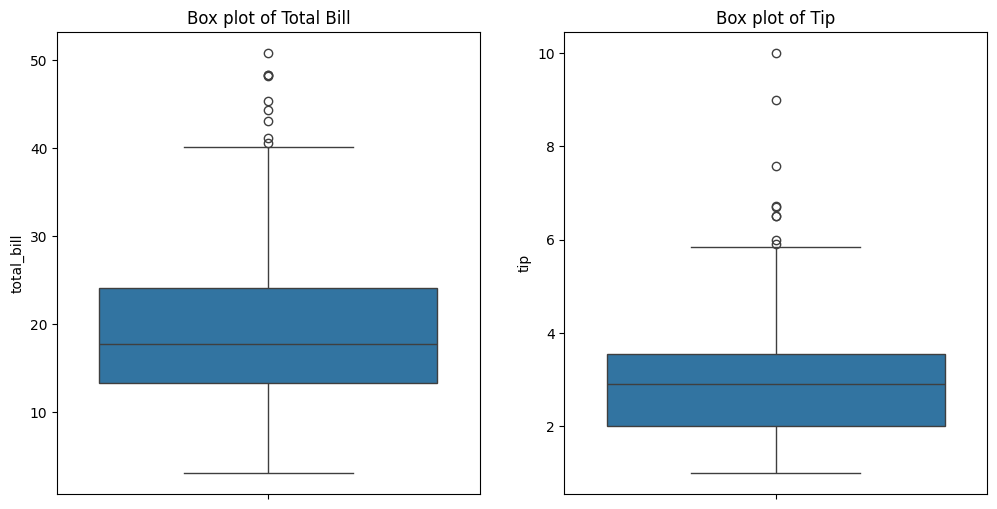

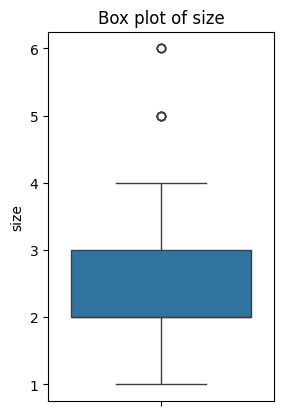

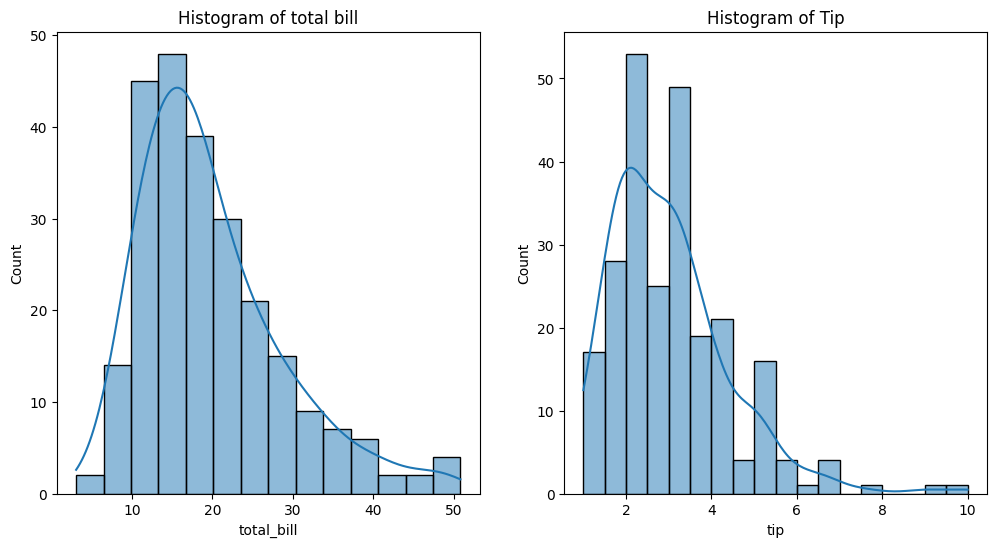

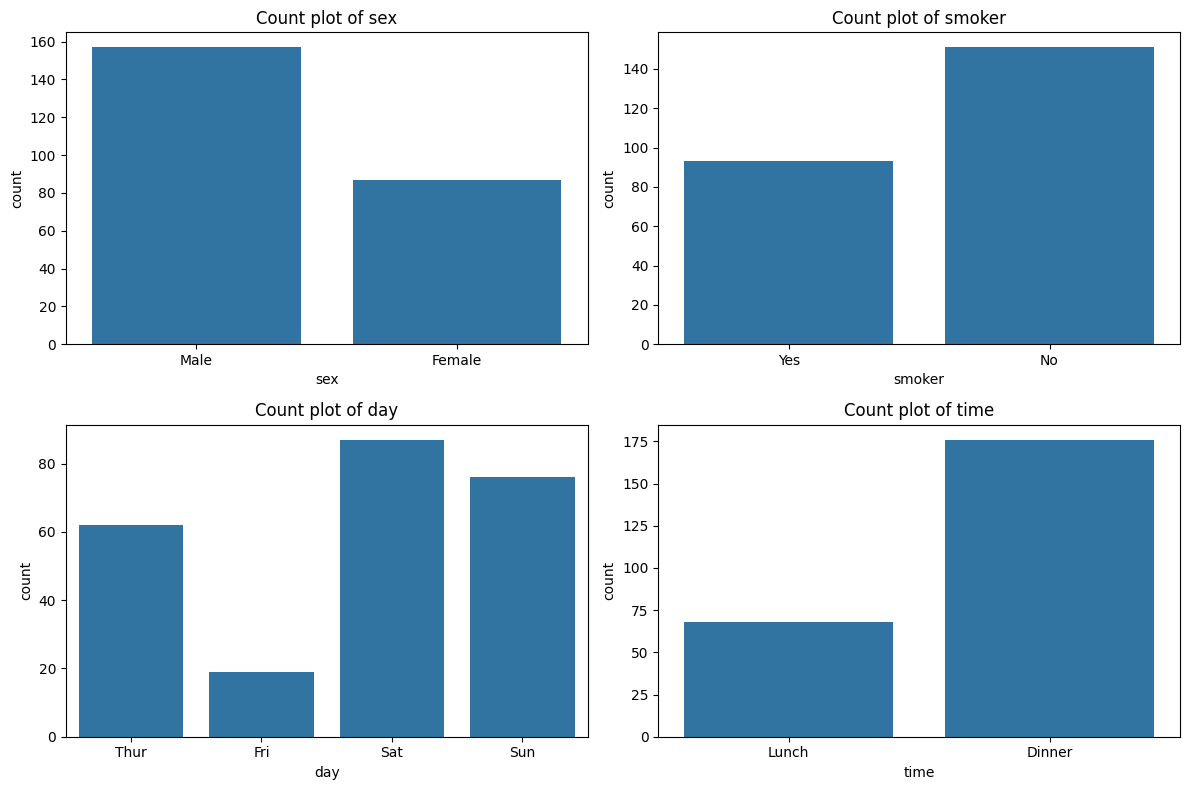

In [176]:
# Box plots for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=tips['total_bill'])
plt.title('Box plot of Total Bill')

plt.subplot(1, 2, 2)
sns.boxplot(y=tips['tip'])
plt.title('Box plot of Tip')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(y=tips['size'])
plt.title('Box plot of size')
plt.show()

# Histograms for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Histogram of total bill')

plt.subplot(1, 2, 2)
sns.histplot(tips['tip'], kde=True)
plt.title('Histogram of Tip')
plt.show()

# Count plots for categorical variables
categorical_vars = ['sex', 'smoker', 'day', 'time']

plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=tips[var])
    plt.title(f'Count plot of {var}')
plt.tight_layout()
plt.show()

In [177]:
tips_encoded.columns
tips_encoded

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,True,False,True
240,27.18,2.00,2,True,False,False,True,False,True
241,22.67,2.00,2,False,False,False,True,False,True
242,17.82,1.75,2,False,True,False,True,False,True


In [178]:
tips_encoded.dtypes

total_bill     float64
tip            float64
size             int64
sex_Female        bool
smoker_No         bool
day_Fri           bool
day_Sat           bool
day_Sun           bool
time_Dinner       bool
dtype: object

In [179]:
cat=['sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']
for i in cat:
    tips_encoded[i]=tips_encoded[i].astype('int')

### Data Preperation

In [184]:
tips_encoded.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

In [187]:
#Outlier Removal
col=['total_bill', 'tip', 'size']
for i in col:
    if tips_encoded[i].dtype in ['int','float']:
        q1=tips_encoded[i].quantile(0.25)
        q3=tips_encoded[i].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        tips_encoded=tips_encoded[(tips_encoded[i]>=lower_bound) & (tips_encoded[i]<=upper_bound)]

In [188]:
tips_encoded.shape

(228, 9)

### Normalization and Splitting Data

In [190]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(tips_encoded)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=tips_encoded.columns)

print("Normalized features using StandardScaler:")
print(scaled_df)

Normalized features using StandardScaler:
     total_bill       tip      size  sex_Female  smoker_No   day_Fri  \
0     -0.202685 -1.672189 -0.555758    1.309307   0.778225 -0.301511   
1     -1.126178 -1.062580  0.585799   -0.763763   0.778225 -0.301511   
2      0.355577  0.663084  0.585799   -0.763763   0.778225 -0.301511   
3      0.726363  0.484890 -0.555758   -0.763763   0.778225 -0.301511   
4      0.852736  0.766249  1.727355    1.309307   0.778225 -0.301511   
..          ...       ...       ...         ...        ...       ...   
223    2.413648  1.760381  0.585799    1.309307   0.778225 -0.301511   
224    1.212412 -0.743707 -0.555758    1.309307  -1.284976 -0.301511   
225    0.586103 -0.743707 -0.555758   -0.763763  -1.284976 -0.301511   
226   -0.087422 -0.978172 -0.555758   -0.763763   0.778225 -0.301511   
227    0.045894  0.194154 -0.555758    1.309307   0.778225 -0.301511   

      day_Sat   day_Sun  time_Dinner  
0   -0.735215  1.487033     0.624695  
1   -0.735215  

In [193]:
x = scaled_df[['total_bill','size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']]
x

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,-0.202685,-0.555758,1.309307,0.778225,-0.301511,-0.735215,1.487033,0.624695
1,-1.126178,0.585799,-0.763763,0.778225,-0.301511,-0.735215,1.487033,0.624695
2,0.355577,0.585799,-0.763763,0.778225,-0.301511,-0.735215,1.487033,0.624695
3,0.726363,-0.555758,-0.763763,0.778225,-0.301511,-0.735215,1.487033,0.624695
4,0.852736,1.727355,1.309307,0.778225,-0.301511,-0.735215,1.487033,0.624695
...,...,...,...,...,...,...,...,...
223,2.413648,0.585799,1.309307,0.778225,-0.301511,1.360147,-0.672480,0.624695
224,1.212412,-0.555758,1.309307,-1.284976,-0.301511,1.360147,-0.672480,0.624695
225,0.586103,-0.555758,-0.763763,-1.284976,-0.301511,1.360147,-0.672480,0.624695
226,-0.087422,-0.555758,-0.763763,0.778225,-0.301511,1.360147,-0.672480,0.624695


In [194]:
y = scaled_df['tip']
y

0     -1.672189
1     -1.062580
2      0.663084
3      0.484890
4      0.766249
         ...   
223    1.760381
224   -0.743707
225   -0.743707
226   -0.978172
227    0.194154
Name: tip, Length: 228, dtype: float64

In [195]:
# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Training set:")
print(X_train)
print(y_train)
print("\nValidation set:")
print(X_val)
print(y_val)
print("\nTesting set:")
print(X_test)
print(y_test)

Training set:
     total_bill      size  sex_Female  smoker_No   day_Fri   day_Sat  \
98     0.551386 -0.555758    1.309307  -1.284976 -0.301511  1.360147   
181   -0.412380 -0.555758   -0.763763  -1.284976 -0.301511 -0.735215   
136    1.194359  4.010468    1.309307   0.778225 -0.301511 -0.735215   
38     1.780396  0.585799   -0.763763   0.778225 -0.301511  1.360147   
132   -0.597079 -0.555758    1.309307   0.778225 -0.301511 -0.735215   
..          ...       ...         ...        ...       ...       ...   
43     1.659578  1.727355   -0.763763   0.778225 -0.301511 -0.735215   
67    -0.892875 -0.555758   -0.763763   0.778225 -0.301511  1.360147   
64    -2.135772 -1.697314    1.309307  -1.284976 -0.301511  1.360147   
92     1.226300 -0.555758   -0.763763  -1.284976  3.316625 -0.735215   
189   -0.756781 -0.555758    1.309307  -1.284976 -0.301511 -0.735215   

      day_Sun  time_Dinner  
98  -0.672480     0.624695  
181 -0.672480    -1.600781  
136 -0.672480    -1.600781  
38  -

### Base Model Building

In [199]:
# Initialize the models
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
decision_tree = DecisionTreeRegressor()

# Function to evaluate the model
def evaluate_model(model, X_val, y_val, X_test, y_test):
    # Validation set predictions and metrics
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    
    # Test set predictions and metrics
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    return {
        'Validation MSE': mse_val,
        'Validation RMSE': rmse_val,
        'Validation MAE': mae_val,
        'Validation R²': r2_val,
        'Test MSE': mse_test,
        'Test RMSE': rmse_test,
        'Test MAE': mae_test,
        'Test R²': r2_test
    }

# Train and evaluate Linear Regression model
linear_regression.fit(X_train, y_train)
results_lr = evaluate_model(linear_regression, X_val, y_val, X_test, y_test)
print(f'Linear Regression Results: {results_lr}')

# Train and evaluate Ridge Regression model
ridge_regression.fit(X_train, y_train)
results_ridge = evaluate_model(ridge_regression, X_val, y_val, X_test, y_test)
print(f'Ridge Regression Results: {results_ridge}')

# Train and evaluate Lasso Regression model
lasso_regression.fit(X_train, y_train)
results_lasso = evaluate_model(lasso_regression, X_val, y_val, X_test, y_test)
print(f'Lasso Regression Results: {results_lasso}')

# Train and evaluate Decision Tree Regressor model
decision_tree.fit(X_train, y_train)
results_tree = evaluate_model(decision_tree, X_val, y_val, X_test, y_test)
print(f'Decision Tree Regressor Results: {results_tree}')

Linear Regression Results: {'Validation MSE': 0.6038232951246172, 'Validation RMSE': 0.7770606766042258, 'Validation MAE': 0.5952617710006232, 'Validation R²': 0.1567650620697747, 'Test MSE': 0.6782091651151361, 'Test RMSE': 0.8235345561147608, 'Test MAE': 0.6736186032220686, 'Test R²': 0.2848107472389191}
Ridge Regression Results: {'Validation MSE': 0.6019335565782712, 'Validation RMSE': 0.7758437707285347, 'Validation MAE': 0.5945319617563755, 'Validation R²': 0.15940406851205435, 'Test MSE': 0.6783810877203508, 'Test RMSE': 0.8236389304302892, 'Test MAE': 0.6740804994209267, 'Test R²': 0.2846294503678639}
Lasso Regression Results: {'Validation MSE': 0.7285074401808209, 'Validation RMSE': 0.8535264730404213, 'Validation MAE': 0.7323880039747298, 'Validation R²': -0.017355459887982372, 'Test MSE': 0.953517473590392, 'Test RMSE': 0.9764821931762975, 'Test MAE': 0.8325335555447866, 'Test R²': -0.005509044272463903}
Decision Tree Regressor Results: {'Validation MSE': 1.0049472303218705, 

### Evaluation

In [201]:
# Initialize the models
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
decision_tree = DecisionTreeRegressor()

# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    # Validation set predictions and metrics
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    
    return {
        'Validation MSE': mse_val,
        'Validation RMSE': rmse_val,
        'Validation MAE': mae_val,
        'Validation R²': r2_val,
        'Residuals': y_val - y_pred_val
    }

# Train and evaluate Linear Regression model
linear_regression.fit(X_train, y_train)
results_lr = evaluate_model(linear_regression, X_val, y_val)
print(f'Linear Regression Results: {results_lr}')

# Train and evaluate Ridge Regression model
ridge_regression.fit(X_train, y_train)
results_ridge = evaluate_model(ridge_regression, X_val, y_val)
print(f'Ridge Regression Results: {results_ridge}')

# Train and evaluate Lasso Regression model
lasso_regression.fit(X_train, y_train)
results_lasso = evaluate_model(lasso_regression, X_val, y_val)
print(f'Lasso Regression Results: {results_lasso}')

# Train and evaluate Decision Tree Regressor model
decision_tree.fit(X_train, y_train)
results_tree = evaluate_model(decision_tree, X_val, y_val)
print(f'Decision Tree Regressor Results: {results_tree}')

Linear Regression Results: {'Validation MSE': 0.6038232951246172, 'Validation RMSE': 0.7770606766042258, 'Validation MAE': 0.5952617710006232, 'Validation R²': 0.1567650620697747, 'Residuals': 29    -0.248617
182    1.395259
191    0.717646
170   -0.633723
58    -0.114279
185   -0.322213
56    -0.157591
61     0.099659
217    1.425131
123   -0.127453
40    -0.286362
52     0.430649
22    -0.051982
53     0.479782
97     0.177200
196    0.080734
171   -0.911447
13    -0.321785
23     0.647493
46    -1.729417
20     1.625953
83    -0.149195
199    0.297885
192    0.386809
95    -0.847923
201   -0.788023
164   -0.784104
120   -0.163455
99     1.318805
224   -1.154890
121   -0.317894
77     0.255112
70     1.793078
4     -0.280343
36     0.454659
142    0.241230
7     -0.806904
Name: tip, dtype: float64}
Ridge Regression Results: {'Validation MSE': 0.6019335565782712, 'Validation RMSE': 0.7758437707285347, 'Validation MAE': 0.5945319617563755, 'Validation R²': 0.15940406851205435, 'Residua

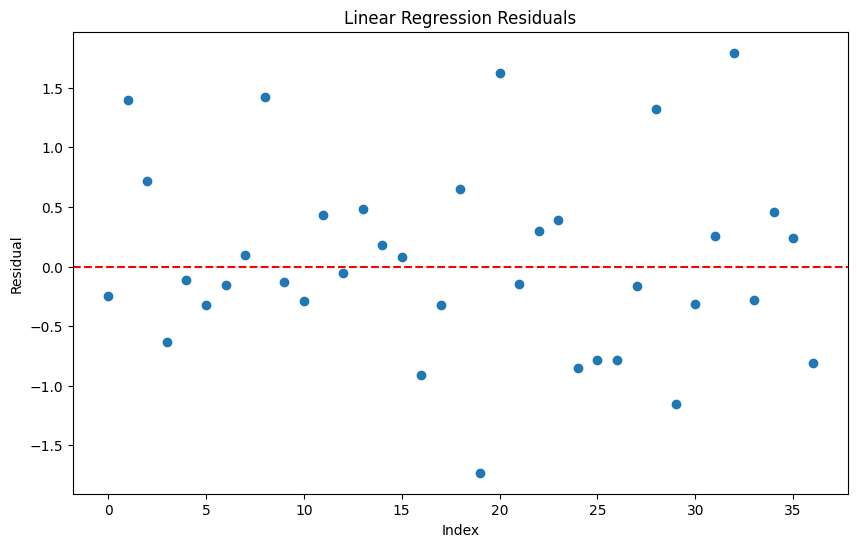

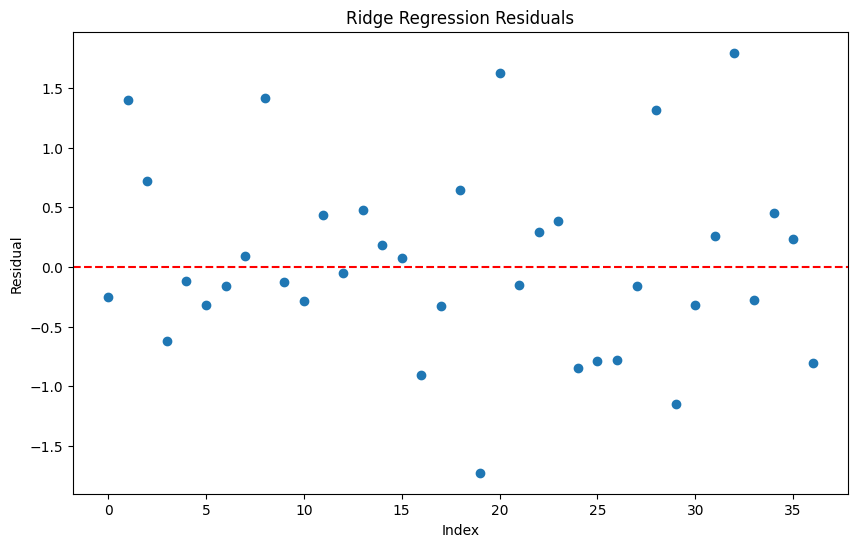

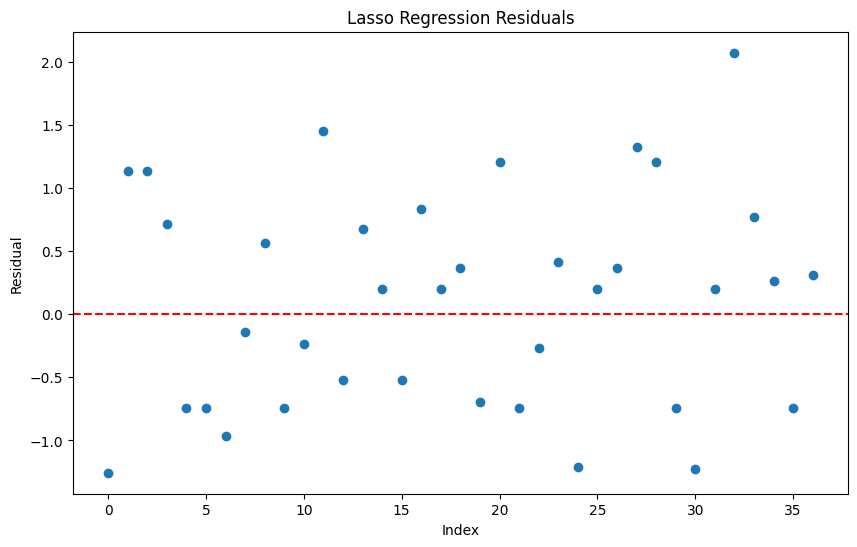

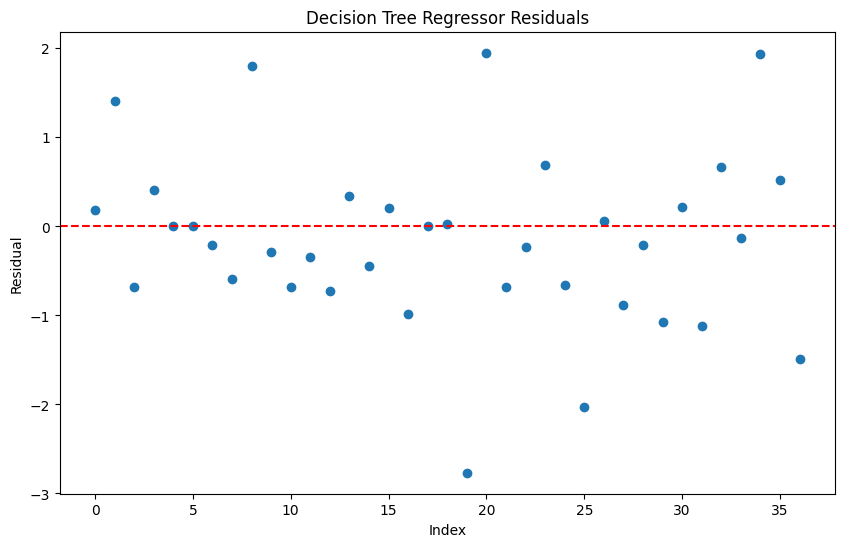

In [202]:
# Analyze residuals for patterns or biases
def plot_residuals(residuals, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.show()

plot_residuals(results_lr['Residuals'], 'Linear Regression Residuals')
plot_residuals(results_ridge['Residuals'], 'Ridge Regression Residuals')
plot_residuals(results_lasso['Residuals'], 'Lasso Regression Residuals')
plot_residuals(results_tree['Residuals'], 'Decision Tree Regressor Residuals')

Best Ridge Regression Results: {'Validation MSE': 0.5271297459110832, 'Validation RMSE': 0.7260370141467191, 'Validation MAE': 0.5610885047103263, 'Validation R²': 0.26386705818831835, 'Residuals': 29    -0.610493
182    1.352677
191    0.778176
170   -0.124675
58    -0.338273
185   -0.398205
56    -0.453551
61    -0.040829
217    1.120939
123   -0.267401
40    -0.276703
52     0.659627
22    -0.172848
53     0.546286
97     0.229164
196   -0.105826
171   -0.409337
13    -0.292462
23     0.573199
46    -1.412963
20     1.498455
83    -0.309777
199    0.125606
192    0.404236
95    -0.963154
201   -0.621713
164   -0.352902
120    0.197400
99     1.342150
224   -0.937659
121   -0.604765
77     0.292617
70     1.957105
4     -0.011690
36     0.362527
142   -0.073923
7     -0.540963
Name: tip, dtype: float64}
Best Lasso Regression Results: {'Validation MSE': 0.5097884655354484, 'Validation RMSE': 0.7139947237448246, 'Validation MAE': 0.5599759281944651, 'Validation R²': 0.2880840329212345,

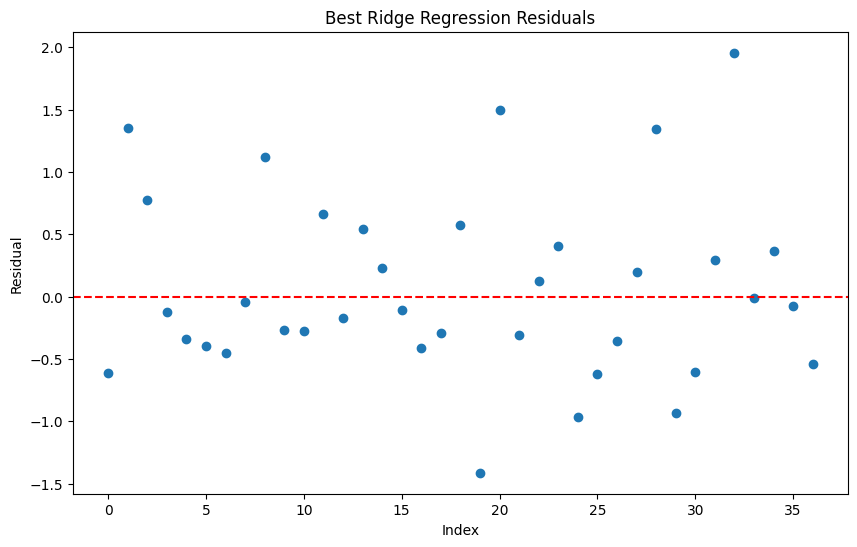

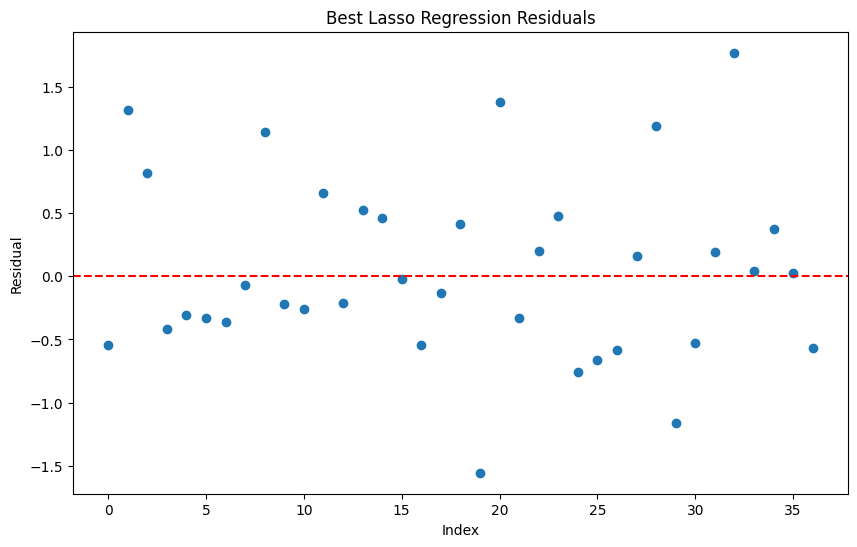

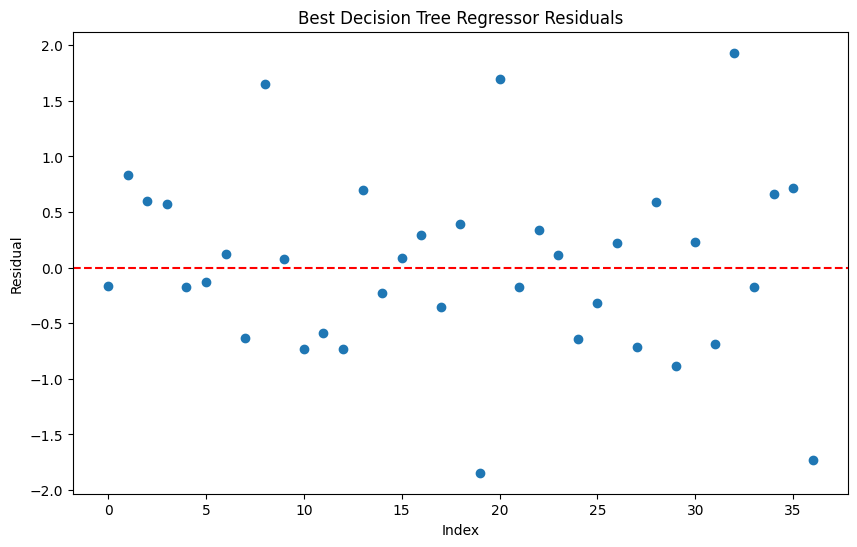

In [203]:
# Initialize the models
ridge_regression = Ridge()
lasso_regression = Lasso()
decision_tree = DecisionTreeRegressor()

# Define hyperparameter grids for Grid Search
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Perform Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(ridge_regression, ridge_params, cv=5)
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_

# Perform Grid Search for Lasso Regression
lasso_grid_search = GridSearchCV(lasso_regression, lasso_params, cv=5)
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_

# Perform Grid Search for Decision Tree Regressor
tree_grid_search = GridSearchCV(decision_tree, tree_params, cv=5)
tree_grid_search.fit(X_train, y_train)
best_tree = tree_grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    # Validation set predictions and metrics
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    
    return {
        'Validation MSE': mse_val,
        'Validation RMSE': rmse_val,
        'Validation MAE': mae_val,
        'Validation R²': r2_val,
        'Residuals': y_val - y_pred_val
    }

# Evaluate the best models from Grid Search
results_ridge = evaluate_model(best_ridge, X_val, y_val)
print(f'Best Ridge Regression Results: {results_ridge}')

results_lasso = evaluate_model(best_lasso, X_val, y_val)
print(f'Best Lasso Regression Results: {results_lasso}')

results_tree = evaluate_model(best_tree, X_val, y_val)
print(f'Best Decision Tree Regressor Results: {results_tree}')

# Analyze residuals for patterns or biases
def plot_residuals(residuals, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.show()

plot_residuals(results_ridge['Residuals'], 'Best Ridge Regression Residuals')
plot_residuals(results_lasso['Residuals'], 'Best Lasso Regression Residuals')
plot_residuals(results_tree['Residuals'], 'Best Decision Tree Regressor Residuals')

In [205]:

# Initialize the models
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
decision_tree = DecisionTreeRegressor()

# Train and evaluate Linear Regression model before tuning
linear_regression.fit(X_train, y_train)
results_lr_before = evaluate_model(linear_regression, X_val, y_val)
print(f'Linear Regression Results Before Tuning: {results_lr_before}')

# Define hyperparameter grids for Grid Search
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Perform Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(ridge_regression, ridge_params, cv=5)
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_

# Perform Grid Search for Lasso Regression
lasso_grid_search = GridSearchCV(lasso_regression, lasso_params, cv=5)
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_

# Perform Grid Search for Decision Tree Regressor
tree_grid_search = GridSearchCV(decision_tree, tree_params, cv=5)
tree_grid_search.fit(X_train, y_train)
best_tree = tree_grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    # Validation set predictions and metrics
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    
    return {
        'Validation MSE': mse_val,
        'Validation RMSE': rmse_val,
        'Validation MAE': mae_val,
        'Validation R²': r2_val,
        'Residuals': y_val - y_pred_val
    }

# Evaluate the best models from Grid Search
results_ridge_after = evaluate_model(best_ridge, X_val, y_val)
print(f'Best Ridge Regression Results After Tuning: {results_ridge_after}')

results_lasso_after = evaluate_model(best_lasso, X_val, y_val)
print(f'Best Lasso Regression Results After Tuning: {results_lasso_after}')

results_tree_after = evaluate_model(best_tree, X_val, y_val)
print(f'Best Decision Tree Regressor Results After Tuning: {results_tree_after}')

# Compare improvements after tuning
def compare_results(before_tuning_results, after_tuning_results):
    comparison = {}
    for metric in before_tuning_results:
        if metric != 'Residuals':
            comparison[metric] = {
                'Before Tuning': before_tuning_results[metric],
                'After Tuning': after_tuning_results[metric],
                'Improvement': before_tuning_results[metric] - after_tuning_results[metric]
            }
    return comparison

comparison_ridge = compare_results(results_lr_before, results_ridge_after)
comparison_lasso = compare_results(results_lr_before, results_lasso_after)
comparison_tree = compare_results(results_lr_before, results_tree_after)

print(f'Comparison of Ridge Regression Results: {comparison_ridge}')
print(f'Comparison of Lasso Regression Results: {comparison_lasso}')
print(f'Comparison of Decision Tree Regressor Results: {comparison_tree}')


Linear Regression Results Before Tuning: {'Validation MSE': 0.6038232951246172, 'Validation RMSE': 0.7770606766042258, 'Validation MAE': 0.5952617710006232, 'Validation R²': 0.1567650620697747, 'Residuals': 29    -0.248617
182    1.395259
191    0.717646
170   -0.633723
58    -0.114279
185   -0.322213
56    -0.157591
61     0.099659
217    1.425131
123   -0.127453
40    -0.286362
52     0.430649
22    -0.051982
53     0.479782
97     0.177200
196    0.080734
171   -0.911447
13    -0.321785
23     0.647493
46    -1.729417
20     1.625953
83    -0.149195
199    0.297885
192    0.386809
95    -0.847923
201   -0.788023
164   -0.784104
120   -0.163455
99     1.318805
224   -1.154890
121   -0.317894
77     0.255112
70     1.793078
4     -0.280343
36     0.454659
142    0.241230
7     -0.806904
Name: tip, dtype: float64}
Best Ridge Regression Results After Tuning: {'Validation MSE': 0.5271297459110832, 'Validation RMSE': 0.7260370141467191, 'Validation MAE': 0.5610885047103263, 'Validation R²

In [206]:
# Evaluate the best models from Grid Search on test set
def evaluate_model_test(model):
    # Test set predictions and metrics
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    return {
        'Test MSE': mse_test,
        'Test RMSE': rmse_test,
        'Test MAE': mae_test,
        'Test R²': r2_test,
        'Predictions': y_pred_test,
        'Actuals': y_test
    }

final_results_ridge = evaluate_model_test(best_ridge)
print(f'Final Ridge Regression Results: {final_results_ridge}')

final_results_lasso = evaluate_model_test(best_lasso)
print(f'Final Lasso Regression Results: {final_results_lasso}')

final_results_tree = evaluate_model_test(best_tree)
print(f'Final Decision Tree Regressor Results: {final_results_tree}')

Final Ridge Regression Results: {'Test MSE': 0.7156374821342445, 'Test RMSE': 0.8459535933691897, 'Test MAE': 0.7221194163021719, 'Test R²': 0.24534161078680894, 'Predictions': array([ 0.43611197, -0.35416154, -0.07506796, -0.41619169,  0.21547648,
        0.49174637, -0.48582029,  0.34348325,  0.21702062, -0.09646211,
        0.22241715,  0.02809787, -0.20720026,  0.54487268, -0.45713391,
       -0.26053427,  0.74810544,  0.13269019,  0.70481969, -0.48728027,
        0.31673976, -0.31997985, -0.1222424 ,  0.28608066, -0.17543148,
        0.24949323,  0.54386979, -0.12001691, -0.35594644, -0.20961318,
        0.04149162,  0.19171283, -0.30916737,  0.24324911, -0.03421487,
       -0.48527893,  1.05403165, -0.4293064 ,  0.93137421, -0.14556771,
       -0.20626991, -0.02629983, -0.10540422, -0.22982562, -0.43144276,
       -0.50749704]), 'Actuals': 215   -0.743707
66    -0.659300
9      0.409862
200   -1.587782
15     1.056986
197   -0.743707
25    -0.743707
193    0.578677
154   -0.74370

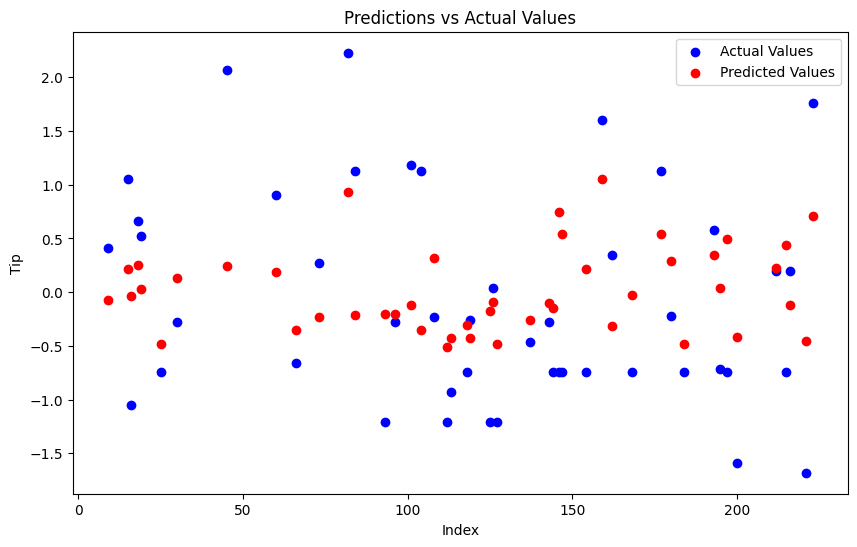

In [207]:
# Visualize predictions vs. actual values for the best model (example: Ridge Regression)
def plot_predictions_vs_actuals(predictions, actuals):
    plt.figure(figsize=(10, 6))
    plt.scatter(actuals.index, actuals.values, color='blue', label='Actual Values')
    plt.scatter(actuals.index, predictions, color='red', label='Predicted Values')
    plt.title('Predictions vs Actual Values')
    plt.xlabel('Index')
    plt.ylabel('Tip')
    plt.legend()
    plt.show()

plot_predictions_vs_actuals(final_results_ridge['Predictions'], final_results_ridge['Actuals'])

In [ ]:
def feature_importance(model):
    feature_importance_df = pd.DataFrame({
        'Feature': x.columns,
        'Importance': model.coef_
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

ridge_feature_importance = feature_importance(best_ridge)
print('Ridge Regression Feature Importance:')
print(ridge_feature_importance)

Ridge Regression Feature Importance:
       Feature  Importance
0   total_bill    0.307675
1         size    0.177709
6      day_Sun    0.084859
7  time_Dinner    0.045310
4      day_Fri    0.029840
2   sex_Female    0.013566
3    smoker_No   -0.029850
5      day_Sat   -0.079821
